#DATASCI W261: Machine Learning at Scale
**Vineet Gangwar  
vineet.gangwar@gmail.com  
W261-2: Machine Learning at Scale  
Assignment #10  
Date: Nov - 16 - 2015**

#HW 10.0: Short answer questions

What is Apache Spark and how is it different to Apache Hadoop? 

Fill in the blanks:
Spark API consists of interfaces to develop applications based on it in Java, ...... languages (list languages). 

Using Spark, resource management can be done either in a single server instance or using a framework such as Mesos or ????? in a distributed manner.

What is an RDD and show a fun example of creating one and bringing the first element back to the driver program.

What is lazy evaluation and give an intuitoive example of lazy evaluation and comment on the massive computational savings to be had from lazy evaluation.

##Answer
####What is Apache Spark and how is it different to Apache Hadoop? 
>Apache Spark is a memory based distributed cluster computing platform that is used for fast and large scale data processing. Hadoop is disk based, has only two operations (map and reduce) and operates in batch mode while Spark is primarily memory based, has over 80 operations and can streaming, interactive queries, and machine learning apart from batch processing

####Fill in the blanks.
>Spark API consists of interfaces to develop applications based on it in Java, **<u>Scala, Python, and R</u>** languages.  
Using Spark, resource management can be done either in a single server instance or using a framework such as Mesos or **<u>YARN</u>** in a distributed manner.

####What is an RDD and show a fun example of creating one and bringing the first element back to the driver program.
>RDD stands for Resilient Distributed Dataset. Spark is build around the idea of RDD. The data on which a Spark program operates is stored in an RDD. RDD is primarily a memory resident distributed dataset. Spark operates on the elements in an RDD in parallel  
Code example:
RDD = sc.parallelize(range(1000)
firstElement = RDD.first()

####What is lazy evaluation and give an intuitive example of lazy evaluation and comment on the massive computational savings to be had from lazy evaluation.
>Spark has 2 classes of operations - transformations and actions which are equivalent to map and reduce. Spark only executes when it encounters an action operation. It does not execute when it encounters a transformation operation.  
Example:  
Suppose the input dataset contains a billion records and that there are 10 tranformations followed by the action RDD.take(1).  
Without lazy evaluation, Spark would have computed the transformation of the billion records 10 times before returning a record. With lazy evaluation, Spark can analyze what is required as the output and then optimize the execution so that it needs to do minimal work to return the result. Essentially Spark only needs to read one record, transform it 10 times and return it

#HW 10.1
In Spark write the code to count how often each word appears in a text document (or set of documents). Please use this homework document as a the example document to run an experiment.  Report the following: provide a sorted list of tokens in decreasing order of frequency of occurence.

##Answer

In [3]:
import os
import sys #current as of 9/26/2015
spark_home = os.environ['SPARK_HOME'] = '/home/vineetgangwar/Documents/spark/'

if not spark_home:
    raise ValueError('SPARK_HOME enviroment variable is not set')
sys.path.insert(0,os.path.join(spark_home,'python'))
sys.path.insert(0,os.path.join(spark_home,'python/lib/py4j-0.8.2.1-src.zip'))
execfile(os.path.join(spark_home,'python/pyspark/shell.py'))

Welcome to
      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  '_/
   /__ / .__/\_,_/_/ /_/\_\   version 1.5.1
      /_/

Using Python version 2.7.10 (default, May 28 2015 17:02:03)
SparkContext available as sc, HiveContext available as sqlContext.


In [10]:
from operator import add
    
filename = 'MIDS-MLS-HW-10.txt'
myFile = sc.textFile(filename).flatMap(lambda x: x.split()).persist()
myFile.map(lambda x: (x, 1)).reduceByKey(add).sortBy(lambda x: x[1]).collect()

[(u'y)', 1),
 (u'sameModel', 1),
 (u'weight(X)=', 1),
 (u'10.2:', 1),
 (u'intuitoive', 1),
 (u'(cluster', 1),
 (u'consists', 1),
 (u'based', 1),
 (u'parameters', 1),
 (u'error(point):', 1),
 (u'(Euclidean', 1),
 (u'Modify', 1),
 (u'3', 1),
 (u'Here', 1),
 (u'languages', 1),
 (u'snippet', 1),
 (u'SQRT(X.X)=', 1),
 (u'2,', 1),
 (u'homework', 1),
 (u'Load', 1),
 (u'return', 1),
 (u'runs=10,', 1),
 (u'KMeans,', 1),
 (u'runs', 1),
 (u'experiment.', 1),
 (u'Berkeley,', 1),
 (u'compute', 1),
 (u'sc.textFile("kmeans_data.txt")', 1),
 (u'bringing', 1),
 (u'program.', 1),
 (u'===========================================================================',
  1),
 (u'resource', 1),
 (u'questions===', 1),
 (u'array([float(x)', 1),
 (u'frequency.', 1),
 (u'(point', 1),
 (u'1/||X||,', 1),
 (u'(or', 1),
 (u'Learning', 1),
 (u'KMeansModel.load(sc,', 1),
 (u'where', 1),
 (u'initializationMode="random")', 1),
 (u'generation', 1),
 (u'begin', 1),
 (u'(homegrown', 1),
 (u'provided).', 1),
 (u'10.4:', 1),
 (u'

#HW 10.1.1
Modify the above word count code to count words that begin with lower case letters (a-z) and report your findings. Again sort the output words in decreasing order of frequency.

##Answer

In [11]:
import string
myFile.filter(lambda x: x[0] in string.ascii_lowercase).map(lambda x: (x, 1)).reduceByKey(add).sortBy(lambda x: x[1]).collect()

[(u'y)', 1),
 (u'sameModel', 1),
 (u'intuitoive', 1),
 (u'consists', 1),
 (u'snippet', 1),
 (u'based', 1),
 (u'parameters', 1),
 (u'error(point):', 1),
 (u'distributed', 1),
 (u'languages', 1),
 (u'homework', 1),
 (u'return', 1),
 (u'runs=10,', 1),
 (u'experiment.', 1),
 (u'compute', 1),
 (u'sc.textFile("kmeans_data.txt")', 1),
 (u'bringing', 1),
 (u'program.', 1),
 (u'runs', 1),
 (u'resource', 1),
 (u'questions===', 1),
 (u'array([float(x)', 1),
 (u'frequency.', 1),
 (u'where', 1),
 (u'initializationMode="random")', 1),
 (u'generation', 1),
 (u'provided).', 1),
 (u'sqrt(sum([x**2', 1),
 (u'please', 1),
 (u'per', 1),
 (u'cell', 1),
 (u'blanks:', 1),
 (u'above', 1),
 (u'math', 1),
 (u'interfaces', 1),
 (u'modify', 1),
 (u'error(point)).reduce(lambda', 1),
 (u'comment', 1),
 (u'implementation', 1),
 (u'length', 1),
 (u'resulting', 1),
 (u'follows:', 1),
 (u'pyspark.mllib.clustering', 1),
 (u'load', 1),
 (u'letters', 1),
 (u'had', 1),
 (u'done', 1),
 (u'array', 1),
 (u'https://www.dropbox

#HW 10.2: KMeans a la MLLib
Using the following  MLlib-centric KMeans code snippet: 

from pyspark.mllib.clustering import KMeans, KMeansModel  
from numpy import array  
from math import sqrt  

\# Load and parse the data
\# NOTE  kmeans_data.txt is available here https://www.dropbox.com/s/q85t0ytb9apggnh/kmeans_data.txt?dl=0 
data = sc.textFile("kmeans_data.txt")
parsedData = data.map(lambda line: array([float(x) for x in line.split(' ')]))

\# Build the model (cluster the data)
clusters = KMeans.train(parsedData, 2, maxIterations=10,
        runs=10, initializationMode="random")

\# Evaluate clustering by computing Within Set Sum of Squared Errors
def error(point):
    center = clusters.centers[clusters.predict(point)]
    return sqrt(sum([x**2 for x in (point - center)]))

WSSSE = parsedData.map(lambda point: error(point)).reduce(lambda x, y: x + y)
print("Within Set Sum of Squared Error = " + str(WSSSE))

\# Save and load model
clusters.save(sc, "myModelPath")
sameModel = KMeansModel.load(sc, "myModelPath")


\# NOTE  kmeans_data.txt is available here https://www.dropbox.com/s/q85t0ytb9apggnh/kmeans_data.txt?dl=0 

Run this code snippet and list the clusters that your find and compute the Within Set Sum of Squared Errors for the found clusters. Comment on your findings.

##Answer

In [13]:
from pyspark.mllib.clustering import KMeans, KMeansModel
from numpy import array
from math import sqrt

# Load and parse the data
# NOTE  kmeans_data.txt is available here https://www.dropbox.com/s/q85t0ytb9apggnh/kmeans_data.txt?dl=0 
data = sc.textFile("kmeans_data.txt")
parsedData = data.map(lambda line: array([float(x) for x in line.split(' ')]))

# Build the model (cluster the data)
clusters = KMeans.train(parsedData, 2, maxIterations=10,
        runs=10, initializationMode="random")

# Evaluate clustering by computing Within Set Sum of Squared Errors
def error(point):
    center = clusters.centers[clusters.predict(point)]
    return sqrt(sum([x**2 for x in (point - center)]))

WSSSE = parsedData.map(lambda point: error(point)).reduce(lambda x, y: x + y)
print("Within Set Sum of Squared Error = " + str(WSSSE))

# Save and load model
clusters.save(sc, "myModelPath")
sameModel = KMeansModel.load(sc, "myModelPath")

Within Set Sum of Squared Error = 0.692820323028


##Printing cluster list

In [14]:
for i in xrange(len(clusters.centers)):
    print "Cluster {0} is {1}".format(i, clusters.centers[i])

Cluster 0 is [ 0.1  0.1  0.1]
Cluster 1 is [ 9.1  9.1  9.1]


#HW 10.3
Download the following KMeans notebook:

https://www.dropbox.com/s/3nsthvp8g2rrrdh/EM-Kmeans.ipynb?dl=0

Generate 3 clusters with 100 (one hundred) data points per cluster (using the code provided). Plot the data.
Then run MLlib's Kmean implementation on this data  and report your results as follows:

  -- plot the resulting clusters after 1 iteration, 10 iterations, after 20 iterations, after 100 iterations.
  -- in each plot please report the Within Set Sum of Squared Errors for the found clusters. Comment on the progress of this measure as 
  the KMEans algorithms runs for more iterations

##Answer

In [27]:
 %matplotlib inline
import numpy as np
import pylab 
import json
size1 = size2 = size3 = 100
samples1 = np.random.multivariate_normal([4, 0], [[1, 0],[0, 1]], size1)
data = samples1
samples2 = np.random.multivariate_normal([6, 6], [[1, 0],[0, 1]], size2)
data = np.append(data,samples2, axis=0)
samples3 = np.random.multivariate_normal([0, 4], [[1, 0],[0, 1]], size3)
data = np.append(data,samples3, axis=0)
# Randomlize data
data = data[np.random.permutation(size1+size2+size3),]
np.savetxt('data.csv',data,delimiter = ',')

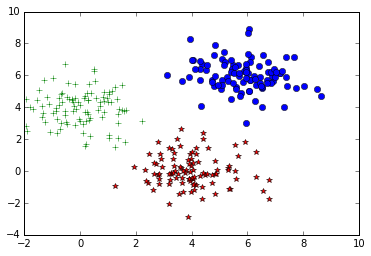

In [28]:
pylab.plot(samples1[:, 0], samples1[:, 1],'*', color = 'red')
pylab.plot(samples2[:, 0], samples2[:, 1],'o', color = 'blue')
pylab.plot(samples3[:, 0], samples3[:, 1],'+', color = 'green')
pylab.show()

In [41]:
# Load and parse the data
data = sc.textFile("data.csv")
parsedData = data.map(lambda line: array([float(x) for x in line.split(',')])).cache()

In [42]:
# Evaluate clustering by computing Within Set Sum of Squared Errors
def error(point, clusters):
    center = clusters.centers[clusters.predict(point)]
    return sqrt(sum([x**2 for x in (point - center)]))

def myKmeans(iterations):
    # Build the model (cluster the data)
    clusters = KMeans.train(parsedData, 3, maxIterations=iterations, runs=1, initializationMode="random")
    # Calculating WSSSE
    WSSSE = parsedData.map(lambda point: error(point, clusters)).reduce(lambda x, y: x + y)
    print("Within Set Sum of Squared Error (WSSSE) = " + str(WSSSE))
    
    # Plotting cluster
    colors = {0: ('red', '*'), 1: ('green', 'o'), 2: ('blue', '+')}

    clustered = parsedData.map(lambda point: (colors[clusters.predict(point)], point)).collect()
    for pair in clustered:
        pylab.plot(pair[1][0], pair[1][1], pair[0][1], color = pair[0][0])
    
    # Printing Centroids
    print "> Centroids:"
    for centroids in clusters.centers:
        print centroids
        pylab.plot(centroids[0], centroids[1], 's', color = 'yellow')

Within Set Sum of Squared Error (WSSSE) = 622.937963413
> Centroids:
[ 0.73930291  4.73418756]
[ 4.53213927  3.49505789]
[ 5.03993128  0.02476158]


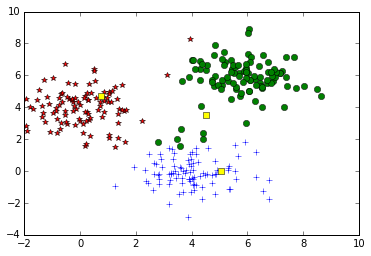

In [43]:
myKmeans(1)

Within Set Sum of Squared Error (WSSSE) = 376.838366514
> Centroids:
[ 5.84486218  6.02476859]
[ 3.97332014  0.00516774]
[ 0.0218808  3.9641607]


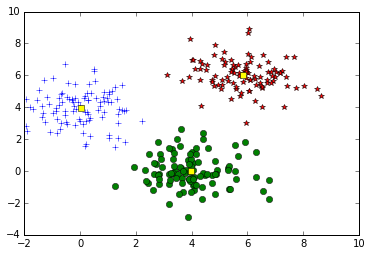

In [44]:
myKmeans(10)

Within Set Sum of Squared Error (WSSSE) = 376.838366514
> Centroids:
[ 0.0218808  3.9641607]
[ 3.97332014  0.00516774]
[ 5.84486218  6.02476859]


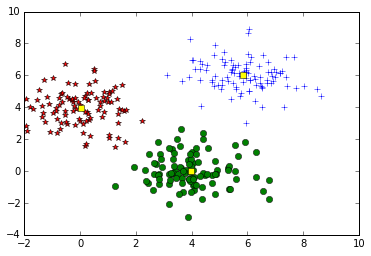

In [45]:
myKmeans(20)

Within Set Sum of Squared Error (WSSSE) = 376.838366514
> Centroids:
[ 5.84486218  6.02476859]
[ 3.97332014  0.00516774]
[ 0.0218808  3.9641607]


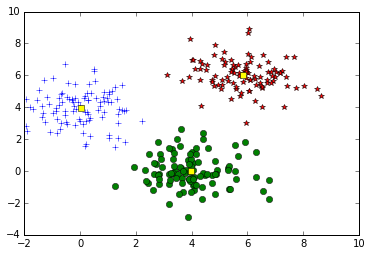

In [46]:
myKmeans(100)

#HW 10.4
Using the KMeans code (homegrown code) provided repeat the experiments in HW10.3. Comment on any differences between the results in HW10.3 and HW10.4. Explain.

##Answer
####Comment on any differences between the results in HW10.3 and HW10.4. Explain.
>- HW10.3 completed a lot faster than HW10.4. This shows that MLLIB library of Spark is better written that executes faster
- From the 10th iteration, the results of both HW10.3 and HW10.4 were the same. Only after the 1st iteration were the results different. This was because the seed centroids were different
- The results of both HW10.3 and HW10.4 converged to the same results because the data did not have local minimas. This is because the data was generated artificially.

In [35]:
def nearest_centroid(point, centroids):
    closest_centroid_idx = np.sum((point - centroids)**2, axis=1).argmin()
    return closest_centroid_idx

def plotPoints(pointsForPlotRDD, centroids):
    pointsForPlot = pointsForPlotRDD.collect()
    c = {0: ('red', '+'), 1: ('blue', 'o'), 2: ('green', '*')}
    
    # Plotting all points
    for cluster, point in pointsForPlot:
        pylab.plot(point[0], point[1], c[cluster][1], color = c[cluster][0])
    
    # Plotting centroids
    for centroid in centroids:
        pylab.plot(centroid[0], centroid[1], 's', color = 'yellow')
    pylab.show()
    
def error_wssse(point_tuple, clusters):
    center = clusters[point_tuple[0]]
    point = point_tuple[1]
    return sqrt(sum([x**2 for x in (point - center)]))

In [36]:
%matplotlib inline
import numpy as np
import pylab
from math import sqrt

# Reading training data
D = sc.textFile("data.csv").map(lambda x: np.array([float(f) for f in x.split(',')])).cache()
centroids = np.array([[0.0,0.0],[2.0,2.0],[0.0,7.0]])

def myKmeans(numIterations, centroids, D):
    for iters in xrange(numIterations):
        pointsPerCluster = D.map(lambda x: (nearest_centroid(x, centroids), x)).countByKey()
        pointsForPlotRDD = D.map(lambda x: (nearest_centroid(x, centroids), x))
        result = D.map(lambda x: (nearest_centroid(x, centroids), x)).reduceByKey(lambda x, y: x + y).sortBy(lambda x: x[0]).collect()

        # Calculating new centroids
        new_centroids = list()
        for idx, pointSum in result:
            new_centroids.append(pointSum/pointsPerCluster[idx])
        new_centroids = np.array(new_centroids)
        
        # Preparing for next loop
        centroids = new_centroids
        
    # Printing results
    print "Iterations:", numIterations
    print "> Centroids:"
    print centroids
    WSSSE = pointsForPlotRDD.map(lambda x: error_wssse(x, centroids)).reduce(lambda x, y: x + y)
    print WSSSE
    plotPoints(pointsForPlotRDD, centroids)

Iterations: 1
> Centroids:
[[ 0.60276951  0.76607729]
 [ 4.01002221  2.57916628]
 [ 1.92101228  5.64066707]]
858.685628251


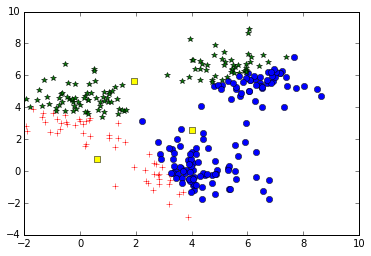

In [37]:
myKmeans(1, centroids, D)

Iterations: 10
> Centroids:
[[  2.18807985e-02   3.96416070e+00]
 [  3.97332014e+00   5.16773830e-03]
 [  5.84486218e+00   6.02476859e+00]]
376.838366514


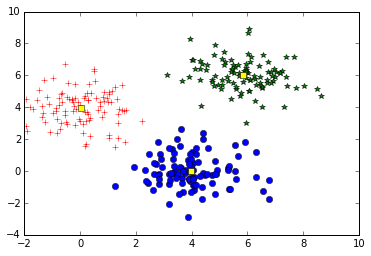

In [38]:
myKmeans(10, centroids, D)

Iterations: 20
> Centroids:
[[  2.18807985e-02   3.96416070e+00]
 [  3.97332014e+00   5.16773830e-03]
 [  5.84486218e+00   6.02476859e+00]]
376.838366514


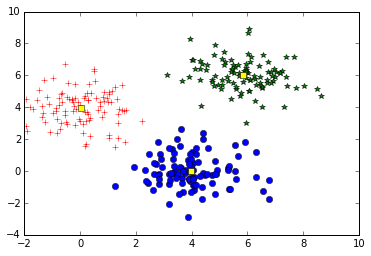

In [39]:
myKmeans(20, centroids, D)

Iterations: 100
> Centroids:
[[  2.18807985e-02   3.96416070e+00]
 [  3.97332014e+00   5.16773830e-03]
 [  5.84486218e+00   6.02476859e+00]]
376.838366514


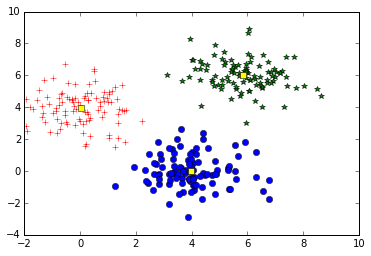

In [40]:
myKmeans(100, centroids, D)